Niall Carbery 22380966

<b>Consider the quantum circuit presented in Fig. 1. The data qubit (qubit 2) and two auxiliary qubits are used
in the three-qubit repetition code for phase flip errors. After the encoding block, the three qubits experience
a phase-flip (Z-operator) error channel. In this channel, qubits 1 and qubit 3 are unchanged, while qubit 2
experiences a Pauli-Z error with probability $p_z$. At the end of the channel (after snapshot 1), the three qubits
decoded and measured (at snapshot 2).</b>

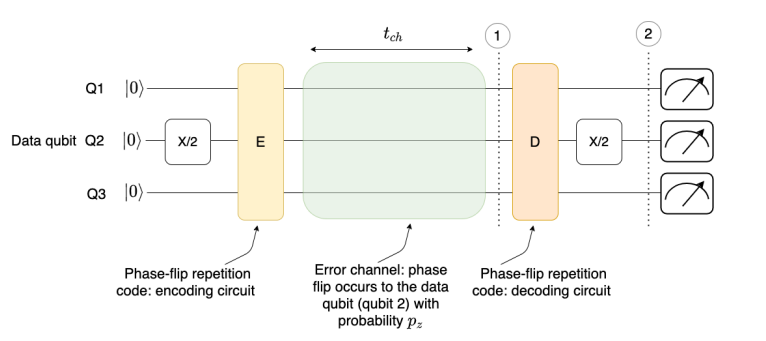

Encoding and Decoding achieved with two Cnot gates with target on data quibit two and three hadamarad gates to rotate on to the right basis, decoding achieved similariliy, The gate root x is defnined below. 

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
tch = np.array([0, 6, 11, 16, 21, 26, 31, 36, 41, 46, 50])
pz = np.array([0.00987, 0.0557, 0.0974, 0.135, 0.169, 0.199, 0.227, 0.252, 0.275, 0.295, 0.306])


In [29]:
def dagger(state):
    return np.transpose(np.conj(state))

indentity = np.array([[1,0],[0,1]])
zero = np.array([[1], [0]])
H_gate = (1/np.sqrt(2))*np.array([[1 ,1], [1, -1]])

cnot_gate = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
upside_down_cnot = np.array([[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]])

rootx = 1/2*np.array([[1+1j,1-1j],[1-1j, 1+1j]])
pauli_X = np.array([[0,1],[1,0]])
pauli_Y = np.array([[0,-1j],[1j,0]])
pauli_Z = np.array([[1,0],[0,-1]])

def three(a, b, c):
    return np.kron(np.kron(a, b), c)

psi1 = three(H_gate, H_gate, H_gate)@np.kron(indentity, cnot_gate)@np.kron(upside_down_cnot, indentity)@three(indentity, rootx, indentity)

end_psi1 = three(indentity, rootx, indentity)@np.kron(upside_down_cnot, indentity)@np.kron(indentity, cnot_gate)@three(H_gate, H_gate, H_gate)

Text(0.5, 0, 'Time (micro sec)')

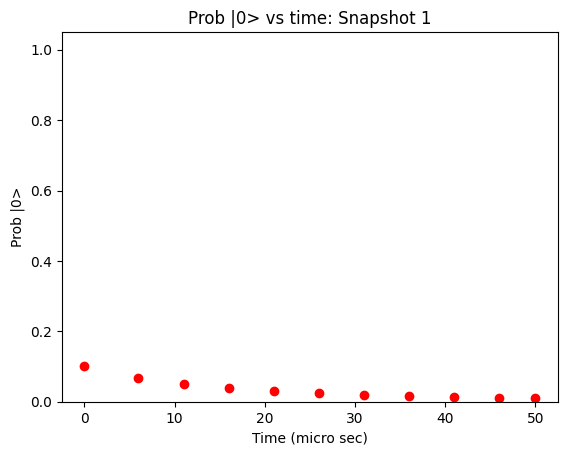

In [30]:
def error_matrix(prob):
    return three(indentity, np.sqrt(1-prob)*indentity+np.sqrt(prob)*pauli_Z, indentity)

for i in range(len(tch)):
    plt.scatter(tch[i], np.abs(((error_matrix(pz[i])@psi1@three(zero, zero,zero))[2])[0])**2, color='r')

plt.ylim(0, 1.05)
plt.title('Prob |0> vs time: Snapshot 1')
plt.ylabel('Prob |0>')
plt.xlabel('Time (micro sec)')

Text(0.5, 0, 'Time (micro sec)')

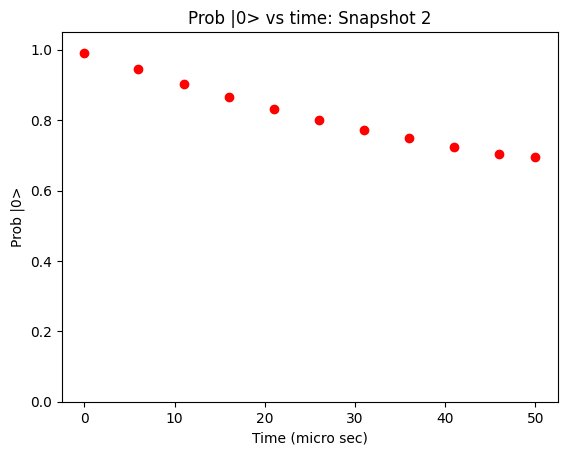

In [31]:
for i in range(len(tch)):
    plt.scatter(tch[i], np.abs(((end_psi1@error_matrix(pz[i])@psi1@three(zero, zero, zero))[2])[0])**2, color='r')

plt.ylim(0, 1.05)
plt.title('Prob |0> vs time: Snapshot 2')
plt.ylabel('Prob |0>')
plt.xlabel('Time (micro sec)')